In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape   #checking the shape of the dataset

(284807, 31)

In [7]:
df.Class.unique()   

array([0, 1], dtype=int64)

In [8]:
df.Class.value_counts()   #checking the total unique value count of dataset

0    284315
1       492
Name: Class, dtype: int64

In [9]:
#its a unbalanced data so we will create a new dataset

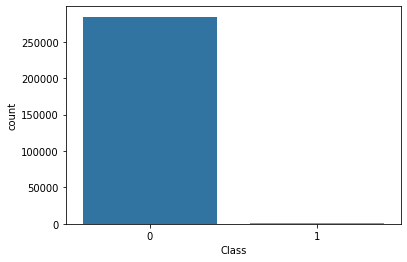

In [10]:
sns.countplot(df['Class'])

In [11]:
#taking the class 0, 1 data

In [12]:
nf = df[df.Class==0]
f = df[df.Class==1]

In [13]:
#extracting the class 0 entries

In [14]:
#Total entries are 1.5* NO. of class-1 entries
nf = nf.sample(738)

In [15]:
#creating new Dataframe
data = f.append(nf,ignore_index=True)

In [16]:
data.shape

(1230, 31)

In [17]:
X = data.drop(['Class'],axis=1)
y=data['Class']

In [18]:
#splitting the DATAset

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [20]:
X_train.shape,X_test.shape

((984, 30), (246, 30))

In [21]:
#Applying StandardScaler to obtain all the features in similar range

In [22]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
X_train.shape[1]

30

In [24]:
#Searching the best Parameters for the model

In [25]:
def build_model(hp):
    model = Sequential()
    i = 0
    for i in range(hp.Int('num_layers', 2,5)):
        if i==0:
            model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 150, 32),kernel_initializer='he_uniform',input_dim=X_train.shape[1],
                               activation='relu'))
            i += 1
        else:
            model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 150, 32),kernel_initializer='he_uniform',
                               activation='relu'))
        
        
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [0.001, 0.0001,0.01])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [26]:
tuner = RandomSearch(
            build_model,
            objective='accuracy',
            max_trials=5,
            executions_per_trial=3,
            directory='project1',
            project_name='Credit card fraud'
)

In [27]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 150, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 150, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 0.01], 'ordered': True}


In [28]:
tuner.search(X_train,y_train,epochs=5)

Trial 5 Complete [00h 00m 04s]
accuracy: 0.9200542171796163

Best accuracy So Far: 0.9715447425842285
Total elapsed time: 00h 00m 24s
INFO:tensorflow:Oracle triggered exit


In [29]:
tuner.results_summary()

Results summary
Results in project1\Credit card fraud
Showing 10 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 4
units_0: 128
units_1: 128
learning_rate: 0.01
units_2: 32
units_3: 32
Score: 0.9715447425842285
Trial summary
Hyperparameters:
num_layers: 2
units_0: 128
units_1: 128
learning_rate: 0.001
units_2: 64
units_3: 96
units_4: 128
Score: 0.963075856367747
Trial summary
Hyperparameters:
num_layers: 2
units_0: 128
units_1: 64
learning_rate: 0.001
Score: 0.9627371033032736
Trial summary
Hyperparameters:
num_layers: 5
units_0: 128
units_1: 64
learning_rate: 0.0001
units_2: 128
units_3: 128
units_4: 32
Score: 0.924119253953298
Trial summary
Hyperparameters:
num_layers: 4
units_0: 96
units_1: 128
learning_rate: 0.0001
units_2: 96
units_3: 64
units_4: 128
Score: 0.9200542171796163


In [30]:
##using the best  parameter got from Randomsearch

In [31]:
model = Sequential()
model.add(layers.Dense(units=128,kernel_initializer='he_uniform',input_dim=X_train.shape[1],activation='relu'))
model.add(layers.Dense(units=96,kernel_initializer='he_uniform',activation='relu'))
model.add(layers.Dense(units=128,kernel_initializer='he_uniform',activation='relu'))
model.add(layers.Dense(units=128,kernel_initializer='he_uniform',activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
31/31 [==============================] - 2s 26ms/step - loss: 1.0930 - accuracy: 0.4027 - val_loss: 0.6553 - val_accuracy: 0.5325
Epoch 2/20
31/31 [==============================] - 0s 4ms/step - loss: 0.5771 - accuracy: 0.6779 - val_loss: 0.4587 - val_accuracy: 0.8659
Epoch 3/20
31/31 [==============================] - 0s 5ms/step - loss: 0.4099 - accuracy: 0.8866 - val_loss: 0.3775 - val_accuracy: 0.8943
Epoch 4/20
31/31 [==============================] - 0s 5ms/step - loss: 0.3234 - accuracy: 0.9138 - val_loss: 0.3279 - val_accuracy: 0.9106
Epoch 5/20
31/31 [==============================] - 0s 5ms/step - loss: 0.2838 - accuracy: 0.9170 - val_loss: 0.2925 - val_accuracy: 0.9187
Epoch 6/20
31/31 [==============================] - 0s 4ms/step - loss: 0.2328 - accuracy: 0.9334 - val_loss: 0.2699 - val_accuracy: 0.9187
Epoch 7/20
31/31 [==============================] - 0s 3ms/step - loss: 0.2009 - accuracy: 0.9370 - val_loss: 0.2539 - val_accuracy: 0.9228
Epoch 8/20
31/31 [=

In [33]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

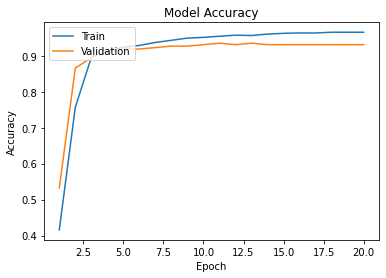

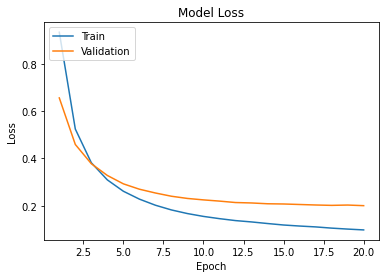

In [34]:
plotLearningCurve(history,20)

In [35]:
#Predicting the test result

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_pred = y_pred>0.5

In [38]:
#making the confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[144,   4],
       [ 13,  85]], dtype=int64)

In [40]:
#calculate the accuracy

In [41]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.9308943089430894